In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from numpy import array

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/UIT/DA_Gr07/Dataset/ADBE_Stock.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
# X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

if len(X_train.shape) == 2:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
if len(X_test.shape) == 2:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
if len(X_val.shape) == 2:
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1292 - val_loss: 0.0125
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - val_loss: 0.0048
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 478.6870751425409
Testing RMSE: 485.5685237139366


In [13]:
#Đánh giá độ chính xác thuật toán bằng MAPE
# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Chuyển đổi y_test và y_val về dạng ban đầu
y_test_original = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val_original = scaler.inverse_transform(yval.reshape(-1, 1))

# Tính toán MAPE cho dữ liệu test và validation
test_mape = mean_absolute_percentage_error(y_test_original, y_pred)
val_mape = mean_absolute_percentage_error(y_val_original, y_pred_val)

# In kết quả
print('Validation MAPE:', val_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 1.2660914172059956
Testing MAPE: 1.8094868098605812


In [14]:
# Hàm tính MAE
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Chuyển đổi y_test và y_val về dạng ban đầu
y_test_original = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val_original = scaler.inverse_transform(yval.reshape(-1, 1))

# Tính toán MAE cho dữ liệu test và validation
test_mae = mean_absolute_error(y_test_original, y_pred)
val_mae = mean_absolute_error(y_val_original, y_pred_val)

# In kết quả
print('Validation MAE:', val_mae)
print('Testing MAE:', test_mae)

Validation MAE: 5.931891236848942
Testing MAE: 8.521391326663151


In [15]:
# 13. Dự báo 30 ngày tiếp theo
# Lấy phần dữ liệu từ ngày thứ 60 đến hết
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input[0])  # Chuyển x_input thành list để dễ thao tác

lst30_output = []
n_steps = 100
i = 0
while (i < 30):
    if (len(temp_input) >= 100):
        # Nếu temp_input có đủ 100 phần tử, lấy 100 phần tử cuối cùng để dự báo
        x_input = np.array(temp_input[-100:])
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Dự báo giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Loại bỏ phần tử đầu tiên để duy trì kích thước 100 phần tử
        lst30_output.extend(yhat.tolist())
        i += 1
    else:
        # Nếu temp_input chưa đủ 100 phần tử, sử dụng tất cả các giá trị hiện có để dự báo
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        lst30_output.extend(yhat.tolist())
        i += 1

# lst_output bây giờ chứa 30 giá trị dự báo tiếp theo
print(lst30_output)

[[0.43079638481140137], [0.4340280294418335], [0.435461163520813], [0.43624454736709595], [0.434223473072052], [0.4362192153930664], [0.4315490126609802], [0.4294249415397644], [0.4277588129043579], [0.4299125075340271], [0.4302499294281006], [0.43067675828933716], [0.4345206022262573], [0.4303264021873474], [0.43473392724990845], [0.43465518951416016], [0.43508273363113403], [0.43931978940963745], [0.44084739685058594], [0.4468950629234314], [0.4497910141944885], [0.45432132482528687], [0.4592974781990051], [0.46429622173309326], [0.4694453477859497], [0.4723876118659973], [0.4791267514228821], [0.4829809069633484], [0.4876940846443176], [0.4914873242378235]]


In [16]:
# 14. Dự báo 60 ngày tiếp theo
# Lấy phần dữ liệu từ ngày thứ 60 đến hết
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input[0])  # Chuyển x_input thành list để dễ thao tác

lst60_output = []
n_steps = 100
i = 0
while (i < 60):
    if (len(temp_input) >= 100):
        # Nếu temp_input có đủ 100 phần tử, lấy 100 phần tử cuối cùng để dự báo
        x_input = np.array(temp_input[-100:])
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Dự báo giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Loại bỏ phần tử đầu tiên để duy trì kích thước 100 phần tử
        lst60_output.extend(yhat.tolist())
        i += 1
    else:
        # Nếu temp_input chưa đủ 100 phần tử, sử dụng tất cả các giá trị hiện có để dự báo
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        lst60_output.extend(yhat.tolist())
        i += 1

# lst_output bây giờ chứa 30 giá trị dự báo tiếp theo
print(lst60_output)

[[0.43079638481140137], [0.4340280294418335], [0.435461163520813], [0.43624454736709595], [0.434223473072052], [0.4362192153930664], [0.4315490126609802], [0.4294249415397644], [0.4277588129043579], [0.4299125075340271], [0.4302499294281006], [0.43067675828933716], [0.4345206022262573], [0.4303264021873474], [0.43473392724990845], [0.43465518951416016], [0.43508273363113403], [0.43931978940963745], [0.44084739685058594], [0.4468950629234314], [0.4497910141944885], [0.45432132482528687], [0.4592974781990051], [0.46429622173309326], [0.4694453477859497], [0.4723876118659973], [0.4791267514228821], [0.4829809069633484], [0.4876940846443176], [0.4914873242378235], [0.49622368812561035], [0.49989569187164307], [0.5040334463119507], [0.5094213485717773], [0.5112318396568298], [0.5153652429580688], [0.5179368257522583], [0.5222140550613403], [0.5259213447570801], [0.5288750529289246], [0.5336138010025024], [0.5366079211235046], [0.5410716533660889], [0.5440288782119751], [0.5475514531135559],

In [17]:
# 14. Dự báo 60 ngày tiếp theo
# Lấy phần dữ liệu từ ngày thứ 60 đến hết
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input[0])  # Chuyển x_input thành list để dễ thao tác

lst90_output = []
n_steps = 100
i = 0
while (i < 90):
    if (len(temp_input) >= 100):
        # Nếu temp_input có đủ 100 phần tử, lấy 100 phần tử cuối cùng để dự báo
        x_input = np.array(temp_input[-100:])
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Dự báo giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Loại bỏ phần tử đầu tiên để duy trì kích thước 100 phần tử
        lst90_output.extend(yhat.tolist())
        i += 1
    else:
        # Nếu temp_input chưa đủ 100 phần tử, sử dụng tất cả các giá trị hiện có để dự báo
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        lst90_output.extend(yhat.tolist())
        i += 1

# lst_output bây giờ chứa 30 giá trị dự báo tiếp theo
print(lst90_output)

[[0.43079638481140137], [0.4340280294418335], [0.435461163520813], [0.43624454736709595], [0.434223473072052], [0.4362192153930664], [0.4315490126609802], [0.4294249415397644], [0.4277588129043579], [0.4299125075340271], [0.4302499294281006], [0.43067675828933716], [0.4345206022262573], [0.4303264021873474], [0.43473392724990845], [0.43465518951416016], [0.43508273363113403], [0.43931978940963745], [0.44084739685058594], [0.4468950629234314], [0.4497910141944885], [0.45432132482528687], [0.4592974781990051], [0.46429622173309326], [0.4694453477859497], [0.4723876118659973], [0.4791267514228821], [0.4829809069633484], [0.4876940846443176], [0.4914873242378235], [0.49622368812561035], [0.49989569187164307], [0.5040334463119507], [0.5094213485717773], [0.5112318396568298], [0.5153652429580688], [0.5179368257522583], [0.5222140550613403], [0.5259213447570801], [0.5288750529289246], [0.5336138010025024], [0.5366079211235046], [0.5410716533660889], [0.5440288782119751], [0.5475514531135559],

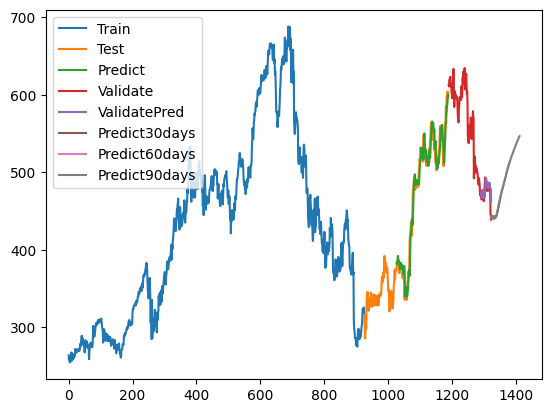

In [18]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect30_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect30_data_index,scaler.inverse_transform(lst30_output))

prediect60_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect60_data_index,scaler.inverse_transform(lst60_output))

prediect90_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect90_data_index,scaler.inverse_transform(lst90_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days', 'Predict60days', 'Predict90days'])
plt.show()